In [1]:
#Importing libraries
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Understanding the dataset

In [2]:
ard = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ard.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
ard.shape

(1460, 81)

In [4]:
ard.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [5]:
ard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Null values
print('Percentage of Missing Values:')
print(round(ard.isnull().sum()/len(ard.index)*100,2).sort_values(ascending=False)[ round(ard.isnull().sum()/len(ard.index),2) > 0 ] )

Percentage of Missing Values:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


So there are total 18 features that have missing values. 6 of these have more than 10% missing values.

In [7]:
# The nulls in these columns show the absence of facility. This may affect the price
# So we impute the categorical variables with 'None'
null_with_meaning = ["BsmtFinType1", "Alley", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "MiscFeature", "MasVnrType", "BsmtQual", "GarageQual", "Fence", "BsmtCond","GarageCond", "PoolQC", "BsmtExposure"]
for i in null_with_meaning:
    ard[i].fillna("none", inplace=True)

#NOTE: we are omitting "LotFrontage", "GarageYrBlt", "MasVnrArea", "Electrical", as according to the data disctionary these have numerical values

In [8]:
#Let's check the null values again
ard.columns[ard.isnull().any()] 
null = ard.isnull().sum()/len(ard)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [9]:
"LotFrontage", "GarageYrBlt", "MasVnrArea", "Electrical", 

('LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'Electrical')

In [10]:
ard['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
ard["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
ard["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [13]:
ard["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [14]:
# Since 'LotFrontage' is a numeric feature with somewhat of a fair distribution, as according to the data dictionary it is in linear feet, it can be imputed with similar 'Neighborhood' values
ard['LotFrontage'] = ard.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
ard["GarageYrBlt"].fillna(ard["GarageYrBlt"].median(), inplace=True)
ard["MasVnrArea"].fillna(ard["MasVnrArea"].median(), inplace=True)
ard["Electrical"].dropna(inplace=True)

In [15]:
#checking all the updated columns
ard['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
ard['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [17]:
ard['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
ard['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [19]:
#just checking that the number of rows retained is 1460 like we have seen above
len(ard.index)
len(ard.index)/1460

1.0

## Moving on to EDA on the prepped data

In [20]:
# finding out the number of numerical features and categorical features
ncol = []
ccol = []
for i in ard.columns:
    if ard[i].dtypes != 'O':
        ncol.append(i)
    else:
        ccol.append(i)
print('There are', len(ncol) ,'numerical features: ')
print('There are', len(ccol), 'categorical features: ')

There are 38 numerical features: 
There are 43 categorical features: 


In [21]:
#looking more into the numeric variables
ard_numeric = ard.select_dtypes(include=['float64', 'int64'])
ard_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Plotting target variable 'SalePrice' against other variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

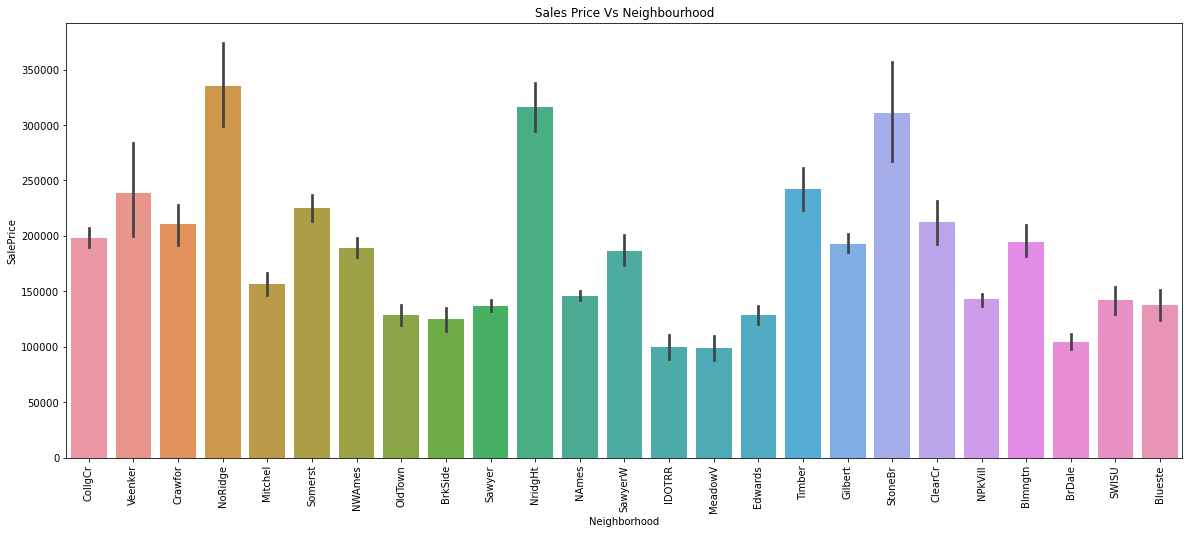

In [22]:
#plotting 'SalePrice' against the 'neighbourhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= ard)
plt.title("Sales Price Vs Neighbourhood")
plt.xticks(rotation=90)

The plot shows the relationship between 'Neighborhood'(Physical locations within Ames city limits) and 'SalePrice'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '20'),
  Text(1, 0, '30'),
  Text(2, 0, '40'),
  Text(3, 0, '45'),
  Text(4, 0, '50'),
  Text(5, 0, '60'),
  Text(6, 0, '70'),
  Text(7, 0, '75'),
  Text(8, 0, '80'),
  Text(9, 0, '85'),
  Text(10, 0, '90'),
  Text(11, 0, '120'),
  Text(12, 0, '160'),
  Text(13, 0, '180'),
  Text(14, 0, '190')])

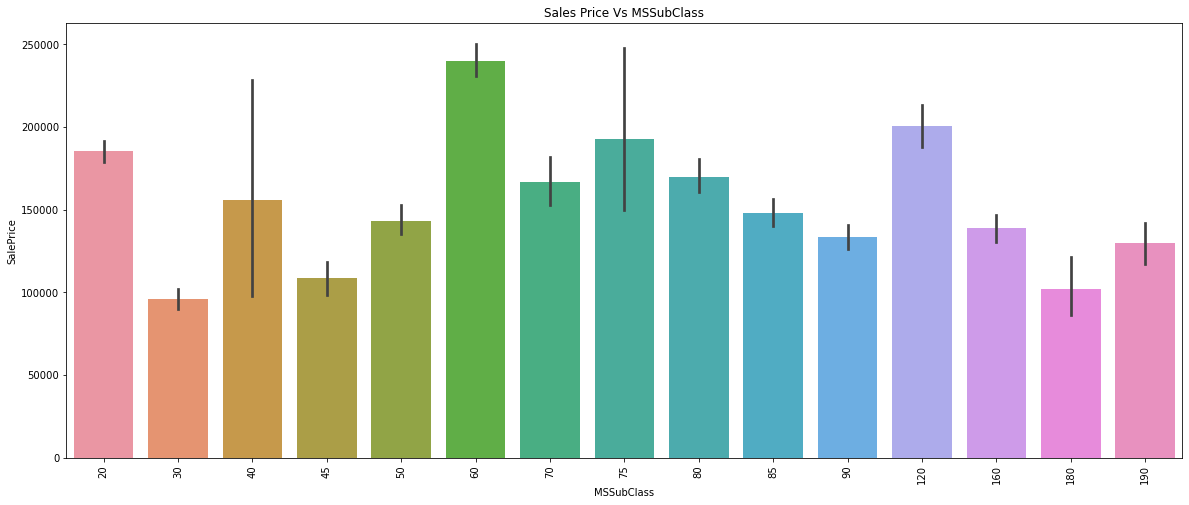

In [23]:
#plotting 'SalePrice' against the 'MSSubclass'
plt.figure(figsize=(20, 8))
sns.barplot(x="MSSubClass", y="SalePrice", data= ard)
plt.title("Sales Price Vs MSSubClass")
plt.xticks(rotation=90)

The plot shows the relationship between 'MSSubClass' (the type of dwelling involved in the sale) and 'SalePrice'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'C (all)'),
  Text(3, 0, 'FV'),
  Text(4, 0, 'RH')])

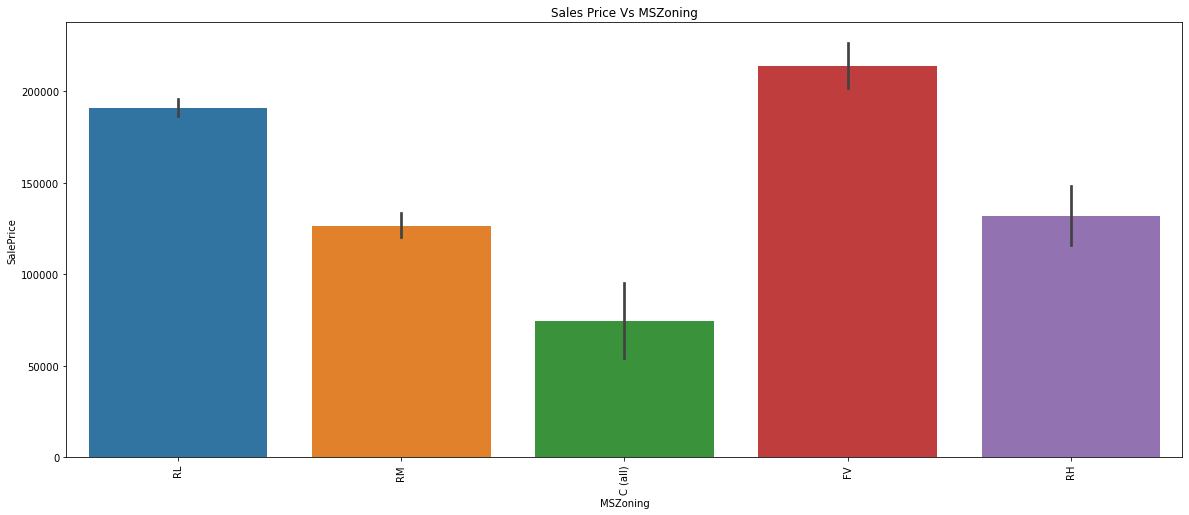

In [24]:
#plotting 'SalePrice' against the 'MSZoning'
plt.figure(figsize=(20, 8))
sns.barplot(x="MSZoning", y="SalePrice", data= ard)
plt.title("Sales Price Vs MSZoning")
plt.xticks(rotation=90)

The type of zoning dictates the sale price of the property, as can be seen clearly from the above plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

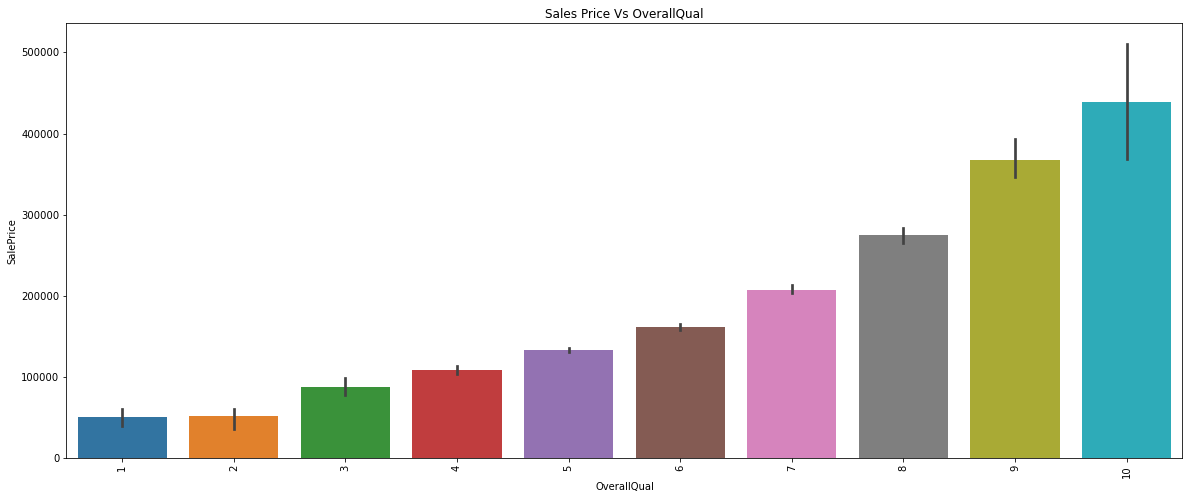

In [25]:
#plotting 'SalePrice' against the 'OverallQual'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= ard)
plt.title("Sales Price Vs OverallQual")
plt.xticks(rotation=90)

So, the quality of the property is tied directly with sale price. It has an incremental directly proportional relation

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

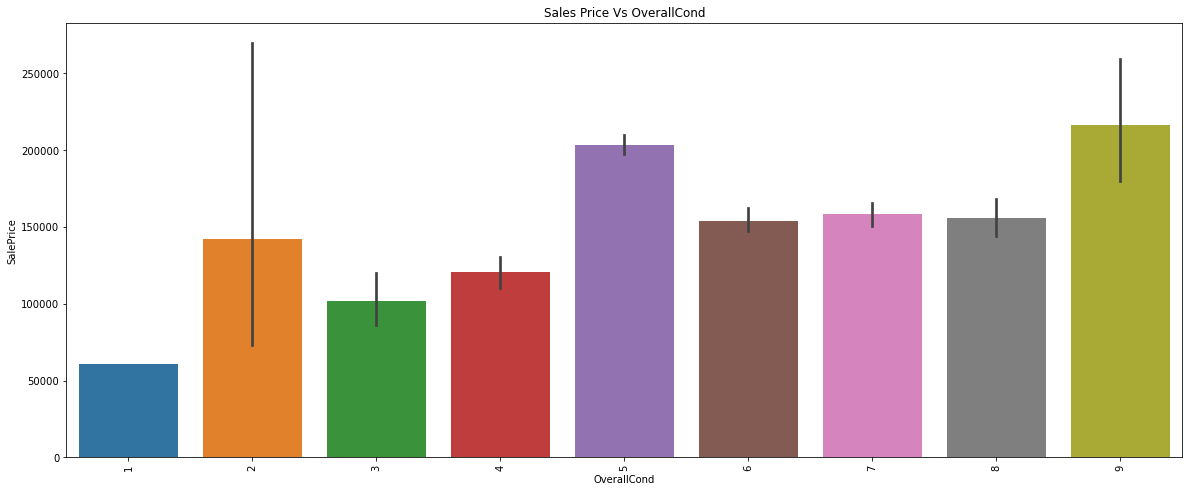

In [26]:
#plotting 'SalePrice' against the 'OverallCond'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= ard)
plt.title("Sales Price Vs OverallCond")
plt.xticks(rotation=90)

Let's plot univariate distribution of 'SalePrice'

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

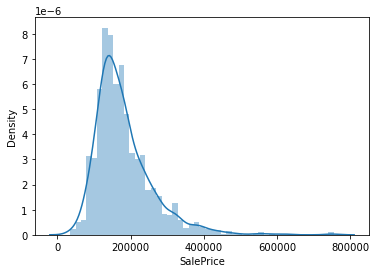

In [27]:
sns.distplot(ard['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

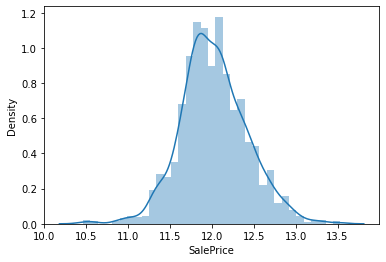

In [28]:
#let's log transform our data to make it more centralized
ard['SalePrice']=np.log1p(ard['SalePrice'])
sns.distplot(ard['SalePrice'])

In [29]:
# plotting the correlation matrix
cor=ard_numeric.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.119174 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.332619  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062380 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.281393  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.349876  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

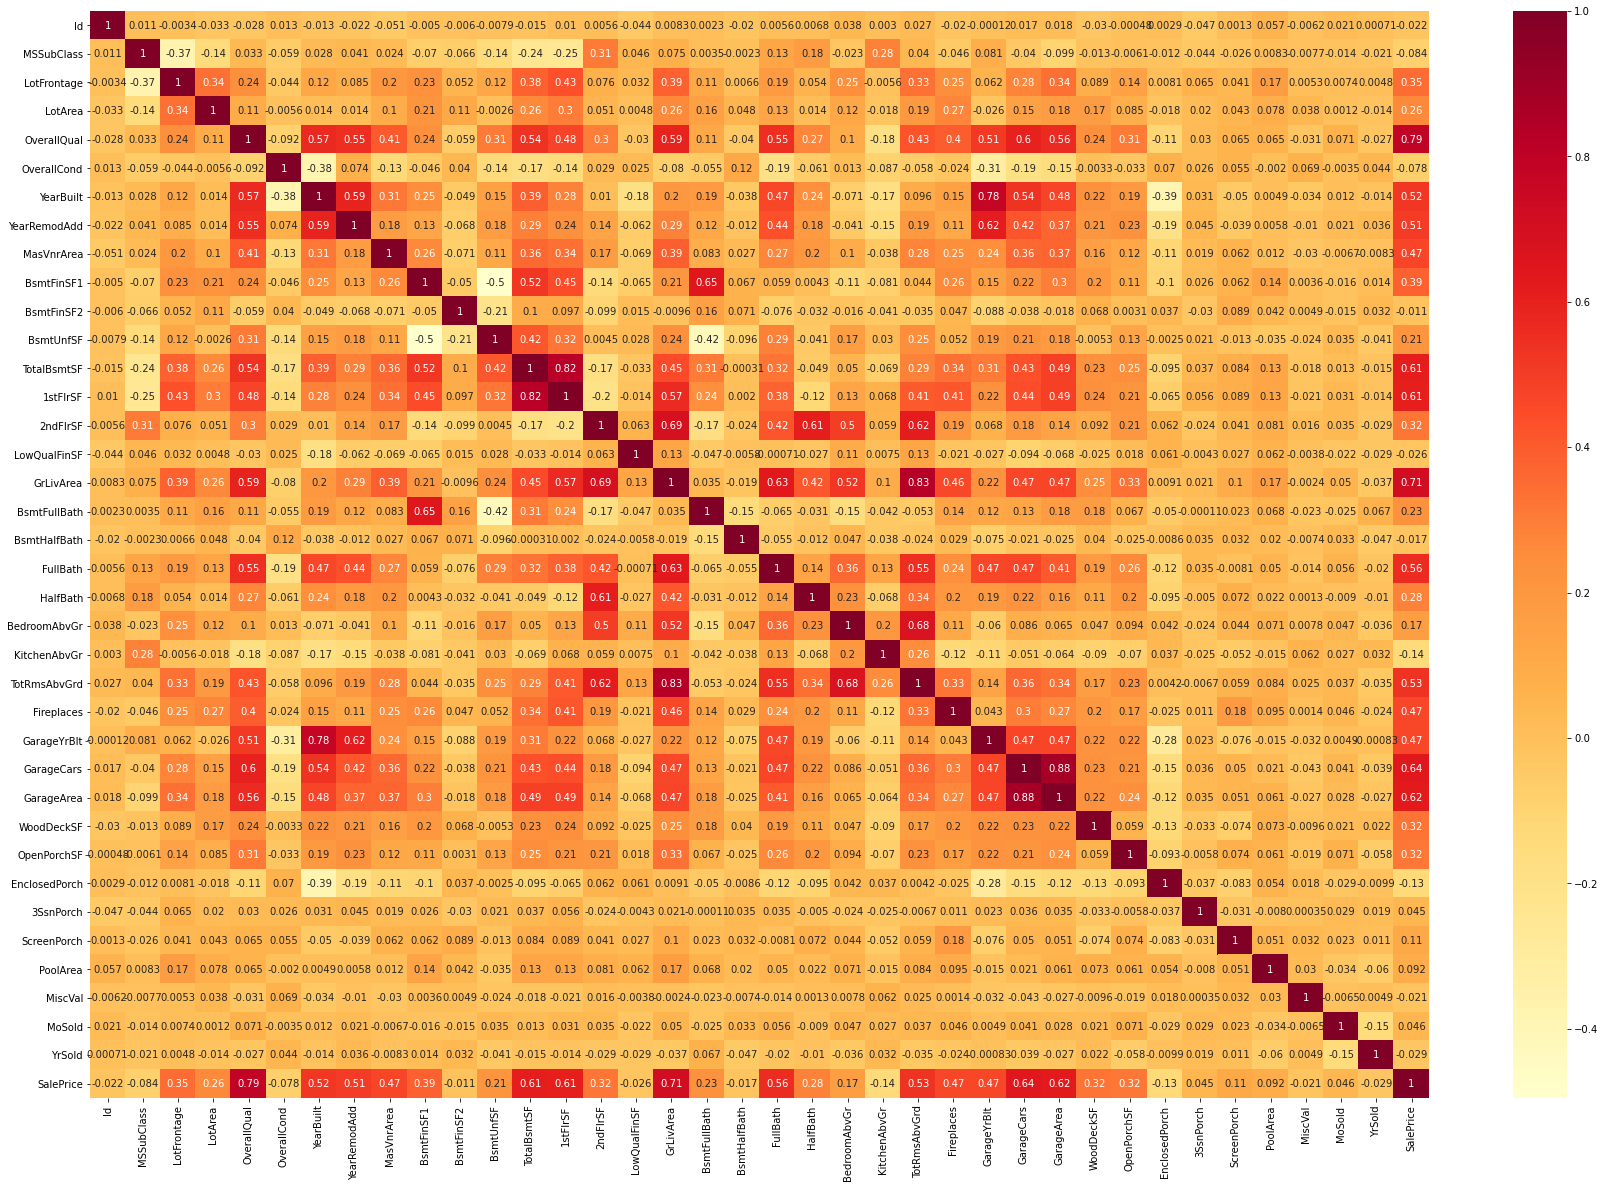

In [30]:
# plotting a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlOrRd", annot=True)
plt.show()

Dropping the columns that show no contribution towards 'SalePrice'

In [31]:
ard1 = ard.drop(['GarageCars'], axis = 1)
ard1 = ard.drop(['BsmtUnfSF'], axis = 1)
ard1 = ard.drop(['TotRmsAbvGrd'], axis = 1)
ard1 = ard.drop(['GarageYrBlt'], axis = 1)    
ard1 = ard.drop(['Id'], axis = 1)#of no use to us for the analysis
ard1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        none   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

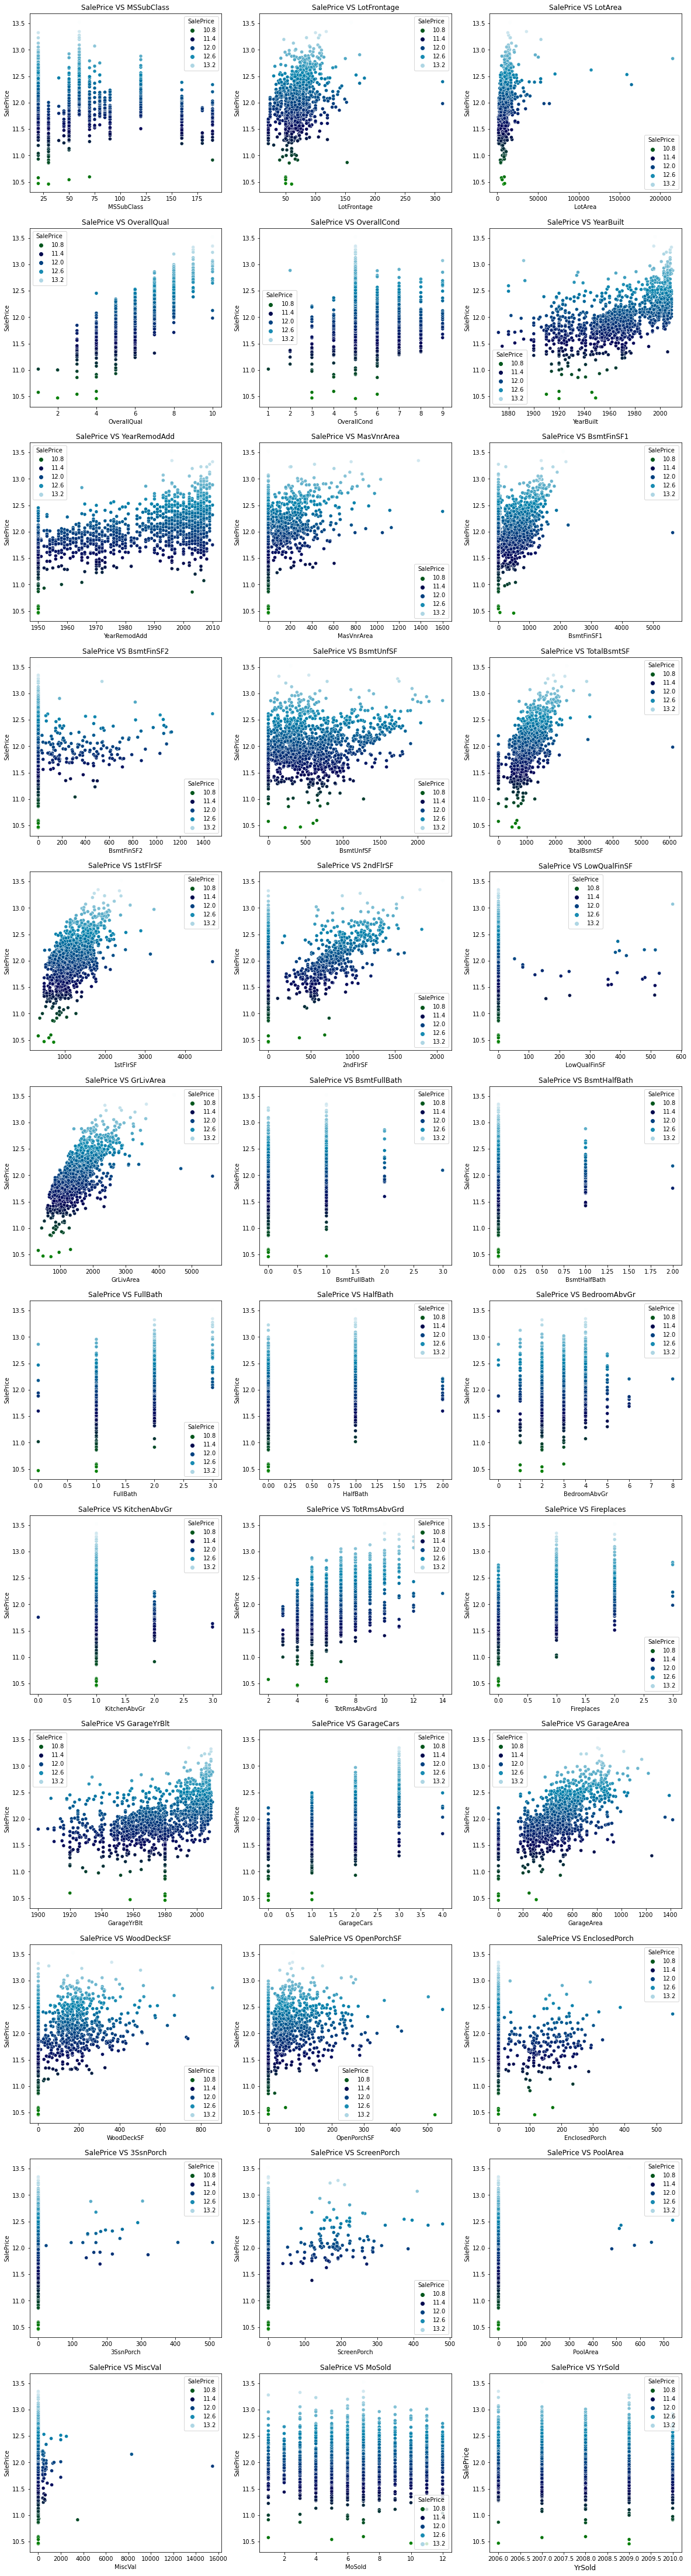

In [32]:
#Visualising numerical predictor variables with Target Variables
ardnum = ard1.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(ardnum.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=ardnum,ax=ax,palette='ocean')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

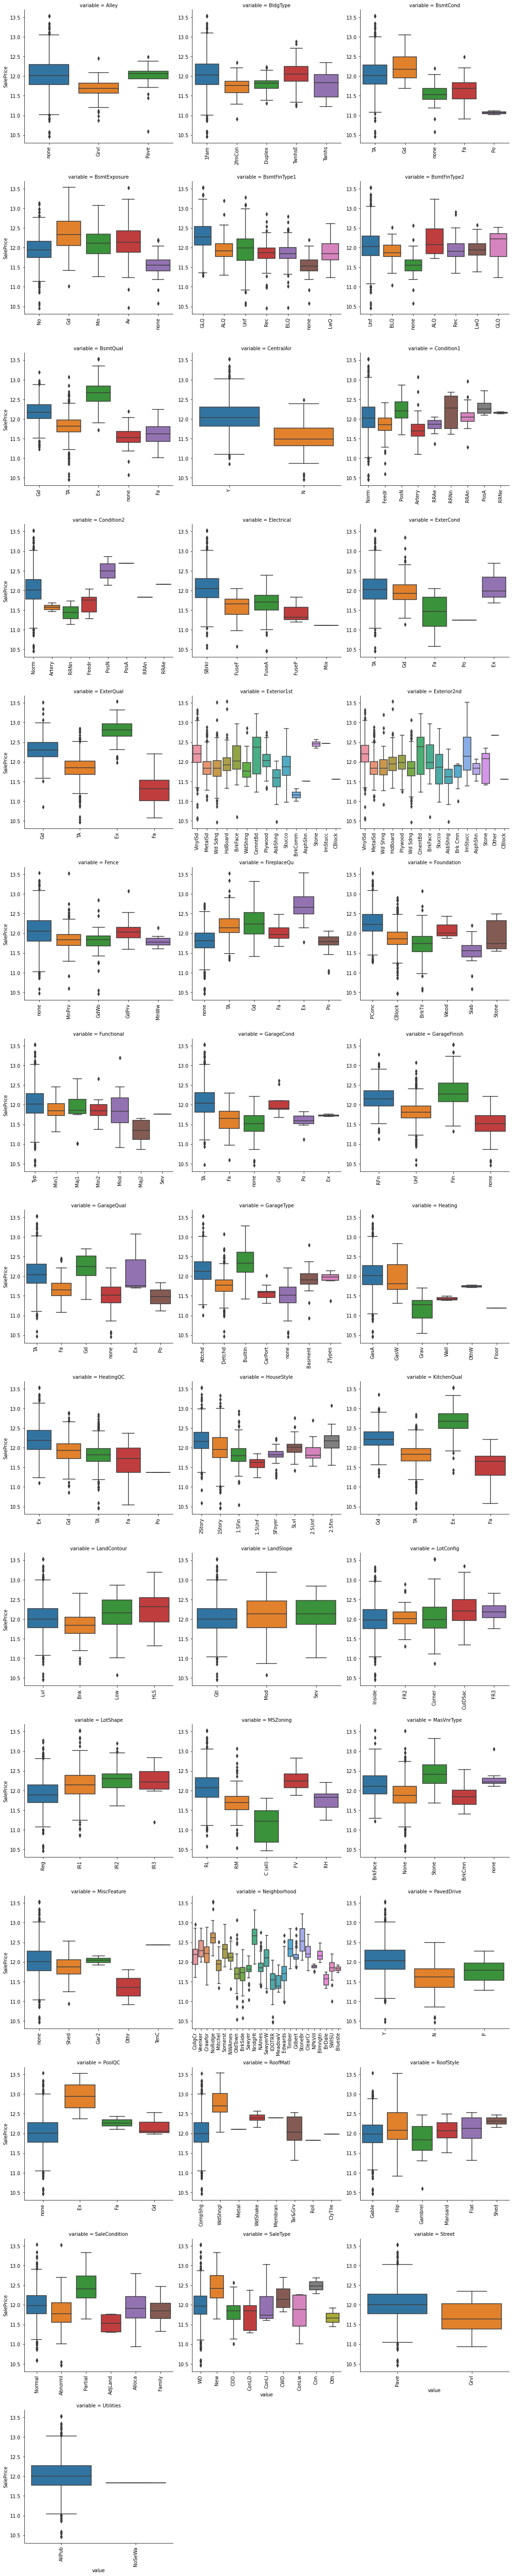

In [33]:
# Plotting Categorical variables against Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = ard1.select_dtypes(exclude=['int64','float64'])
f = pd.melt(ard1, id_vars=['SalePrice'], value_vars=sorted(ard1[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

From the above data, we can point out some important variables:
- 'GrLivArea'
- 'LotFrontage'
- 'LotArea'
- '1stFlrSF'
- '2ndFlrSF'
- 'OverallQual'
- 'OverallCond'
These variables show a strong association with our variable 'SalePrice'

We have to create a column that stands for the age of the property,i.e.= 'AgeP'

In [34]:
# AgeP = Property Age from yearsold - yearbuilt
ard1['AgeP'] = (ard1['YrSold'] - ard1['YearBuilt'])
ard1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        none   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

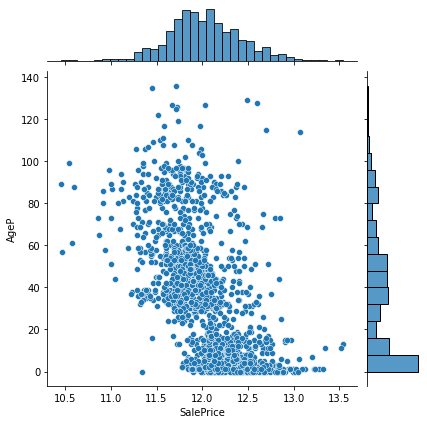

In [35]:
# AgeP against SalePrice
sns.jointplot(y = ard1['AgeP'], x = ard1['SalePrice'])
plt.show()

So the trend followed is obviously when the property is new it will fetch a higher price, as compared to older properties.

Some columns that serve no purpose any further can be dropped before we create our model

In [36]:
ard1 = ard1.drop(['MoSold'], axis = 1)
ard1 = ard1.drop(['YrSold'], axis = 1)
ard1 = ard1.drop(['YearBuilt'], axis = 1)
ard1 = ard1.drop(['YearRemodAdd'], axis = 1)
ard1 = ard1.drop(['Utilities'], axis = 1)
ard1 = ard1.drop(['Street'], axis = 1)
ard1.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450  none      Reg         Lvl   
1          20       RL         80.0     9600  none      Reg         Lvl   
2          60       RL         68.0    11250  none      IR1         Lvl   
3          70       RL         60.0     9550  none      IR1         Lvl   
4          60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0        none     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA     Attchd       2001.0          RFn           2   
3           1    

## Data Preparation

In [37]:
#type of each feature in data: int, float, object
types = ard1.dtypes
numtype = types[(types == 'int64') | (types == float)]#numerical values are either type int or float 
cattype = types[types == object]#categorical values are type object

In [38]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     41
int64      30
float64     4
Name: 0, dtype: int64

It would be easier to work with lists. Therefore, we should convert the numerical and categorical variables into lists.

In [39]:
numcolumns = list(numtype.index)
print(numcolumns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeP']


In [40]:
catcolumns = list(cattype.index)
print(catcolumns)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Dummy variable creation:

In [41]:
ard1 = pd.get_dummies(ard1, drop_first=True )
ard1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  AgeP  MSZoning_FV  MSZoning_RH  \
0            0         0        0  12.247699     5            0            0   
1            0         0        0  12.109016    31            0            0   
2            0         0        0  12.317171     7            0            0   
3            0         0        0  11.849405    91            0            0   
4            0         0        0  12.429220     8            0            0   

   MSZoning_RL  MSZoning_RM  Alley_Pave  Alley_none  LotShape_IR2  \
0            1            0           0           1             0   
1            1            0           0           1             0   
2            1            0           0           1             0   
3            1            0           0           1             0   
4            1            0           0           1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1            

In [42]:
X = ard1.drop(['SalePrice'], axis = 1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  AgeP  MSZoning_FV  MSZoning_RH  \
0            0         0        0     5            0            0   
1            0         0        0    31            0            0   
2            0         0        0     7            0            0   
3            0         0        0    91            0            0   
4            0         0        0     8            0            0   

   MSZoning_RL  MSZoning_RM  Alley_Pave  Alley_none  LotShape_IR2  \
0            1            0           0           1             0   
1            1            0           0           1             0   
2            1            0           0           1             0   
3            1            0           0           1             0   
4            1            0           0           1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighbo

In [43]:
y = ard1['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Splitting the data into test and train sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [45]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeP']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeP']])

In [46]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
175    -0.870387     0.612765  0.166080    -0.059996     1.252715   -0.575015   
1408    0.304785    -0.432534 -0.261043    -1.501313     1.252715   -0.575015   
1148   -0.165284    -0.432534 -0.439778     0.660663     1.252715   -0.575015   
861     3.125199     0.220778  0.079341    -0.780655    -1.406374   -0.575015   
220    -0.870387     0.133670 -0.151525     0.660663    -0.520011   -0.575015   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
175     0.085426   -0.283127        725     0.347365  2.572160 -0.797551   
1408   -0.943351   -0.283127        622    -0.973680 -1.069794  0.630928   
1148   -0.943351   -0.283127        572    -1.087563 -1.504156  0.440311   
861     0.870488   -0.283127        198    -0.023894 -0.303879 -0.797551   
220    -0.943351   -0.283127       1498     1.021554  0.875837 -0.797551   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
175      -0.121406   1.229791      1.105326     -0.232279  0.786946 -0.751723   
1408     -0.121406  -0.279140     -0.807450     -0.232279 -1.006519 -0.751723   
1148     -0.121406  -0.757443     -0.807450     -0.232279 -1.006519 -0.751723   
861      -0.121406  -0.894101      1.105326     -0.232279 -1.006519  1.246998   
220      -0.121406  -0.022906     -0.807450     -0.232279  0.786946 -0.751723   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
175       1.407703     -0.212991             7    0.622339       1950.0   
1408      0.176114     -0.212991             6   -0.935034       1966.0   
1148     -1.055475     -0.212991             5    0.622339       1982.0   
861       0.176114     -0.212991             6   -0.935034       1965.0   
220      -1.055475     -0.212991             5   -0.935034       2006.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
175            2    0.478002   -0.740805    -0.261563       0.282917   
1408           2    0.256615   -0.740805    -0.721923      -0.358041   
1148           1   -0.850325   -0.740805    -0.721923       2.534487   
861            2    0.145921   -0.740805    -0.721923      -0.358041   
220            2    0.934615    2.124358    -0.198065      -0.358041   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  AgeP  MSZoning_FV  \
175   -0.110736    -0.260661 -0.062302        0    57            0   
1408  -0.110736     3.016768 -0.062302        0   100            0   
1148  -0.110736    -0.260661 -0.062302        0    82            0   
861   -0.110736    -0.260661 -0.062302        0    45            0   
220   -0.110736    -0.260661 -0.062302        0     0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Pave  Alley_none  \
175             0            1            0           0           1   
1408            0            0            1           0           1   
1148            0            0            1           0           1   
861             0            1            0           0           1   
220             0            1            0           0           1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
175              0             0             1                0   
1408             0             0             1                0   
1148             0             0             1                0   
861              0             0             1                0   
220              0             0             0                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
175                 0                1                  0              0   
1408                0                1                  0              0   
1148                0                1                  0              0   
861                 0                1                  0              0   
220                 0                1                  0   

In [47]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
930    -0.879672     0.106932 -0.211538     1.358461    -0.509551   -0.560080   
530     0.559791     0.676372  0.029981    -0.099887    -0.509551    0.597117   
1291    2.479076    -2.360638 -1.583933    -0.829061     1.350309    0.856033   
1385   -0.159940    -1.459026 -0.872447    -1.558235     2.280239   -0.560080   
305    -0.879672     0.439105  0.065215     1.358461    -0.509551    0.739785   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
930    -1.009468   -0.301886       1450     0.899165  0.771223 -0.791130   
530     0.743814   -0.301886        678     0.887692  0.884656 -0.791130   
1291   -0.518001   -0.301886        399    -1.019124 -1.434127  0.740428   
1385    0.634091   -0.301886         61    -0.638220 -0.996222  0.024789   
305     2.300508   -0.301886        536     2.124484  2.179903 -0.791130   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
930      -0.119344  -0.117457     -0.851855     -0.261329  0.798671 -0.786336   
530      -0.119344  -0.035051      1.111895     -0.261329  0.798671 -0.786336   
1291     -0.119344  -0.431748     -0.851855     -0.261329  0.798671  1.181751   
1385     -0.119344  -0.715377      1.111895     -0.261329 -1.072013 -0.786336   
305      -0.119344   0.905907      1.111895     -0.261329  0.798671 -0.786336   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
930       0.135738     -0.208108             7   -0.987888       2007.0   
530       0.135738     -0.208108             5    0.551952       1988.0   
1291      0.135738     -0.208108             6   -0.987888       1972.0   
1385      0.135738     -0.208108             7   -0.987888       1922.0   
305       0.135738     -0.208108             8   -0.987888       2004.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
930            3    0.657098   -0.019795    -0.427207      -0.362773   
530            2    0.608692    0.924930    -0.673305      -0.362773   
1291           1   -1.017758    0.627799    -0.673305      -0.362773   
1385           1   -1.133933   -0.781670     0.639219      -0.362773   
305            3    2.002793    0.498280    -0.673305      -0.362773   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  AgeP  MSZoning_FV  \
930   -0.128962    -0.293788 -0.082098        0     2            0   
530   -0.128962    -0.293788 -0.082098        0    20            0   
1291  -0.128962    -0.293788 -0.082098        0    37            0   
1385  -0.128962    -0.293788 -0.082098        0    88            0   
305   -0.128962    -0.293788 -0.082098        0     3            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Pave  Alley_none  \
930             0            1            0           0           1   
530             0            1            0           0           1   
1291            0            0            1           0           1   
1385            0            0            1           0           1   
305             0            1            0           0           1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
930              0             0             0                1   
530              0             0             1                0   
1291             0             0             1                0   
1385             0             0             1                0   
305              0             0             1                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
930                 0                0                  0              0   
530                 0                1                  0              0   
1291                0                1                  0              0   
1385                0                1                  0              0   
305                 0                1                  0   

## Let's build a model

In [48]:
# Running RFE to find variables with high predictive value
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [49]:
# Rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 141),
 ('LotFrontage', False, 66),
 ('LotArea', False, 24),
 ('OverallQual', True, 1),
 ('OverallCond', False, 14),
 ('MasVnrArea', False, 115),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 114),
 ('BsmtUnfSF', False, 152),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 47),
 ('BsmtHalfBath', False, 128),
 ('FullBath', False, 56),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', False, 144),
 ('KitchenAbvGr', False, 58),
 ('TotRmsAbvGrd', False, 98),
 ('Fireplaces', False, 146),
 ('GarageYrBlt', False, 148),
 ('GarageCars', False, 45),
 ('GarageArea', False, 8),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 117),
 ('3SsnPorch', False, 126),
 ('ScreenPorch', False, 82),
 ('PoolArea', False, 59),
 ('MiscVal', False, 151),
 ('AgeP', False, 142),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1)

In [50]:
# Selecting the top 100 variables from the data above
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LandSlope_Mod', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       

In [51]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'MiscFeature_Shed', 'MiscFeature_TenC', 'MiscFeature_none',
       'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Partial', 'PropAge'],
      dtype='object', length=156)

In [52]:
# Using the RFE selected variables, making X_test
X_train_rfe = X_train[col]

In [53]:
X_train_rfe = pd.DataFrame(X_train[col])

In [54]:
X_train_rfe.head()

OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
175     -0.059996     0.347365  2.572160 -0.797551     -0.121406   1.229791   
1408    -1.501313    -0.973680 -1.069794  0.630928     -0.121406  -0.279140   
1148     0.660663    -1.087563 -1.504156  0.440311     -0.121406  -0.757443   
861     -0.780655    -0.023894 -0.303879 -0.797551     -0.121406  -0.894101   
220      0.660663     1.021554  0.875837 -0.797551     -0.121406  -0.022906   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  \
175             0            0            1            0                  0   
1408            0            0            0            1                  0   
1148            0            0            0            1                  0   
861             0            0            1            0                  0   
220             0            0            1            0                  0   

      LandSlope_Mod  Neighborhood_Blueste  Neighborhood_BrDale  \
175               0                     0                    0   
1408              0                     0                    0   
1148              0                     0                    0   
861               0                     0                    0   
220               0                     0                    0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
175                      0                     0                     1   
1408                     0                     0                     0   
1148                     0                     0                     0   
861                      0                     0                     0   
220                      0                     0                     0   

      Neighborhood_MeadowV  Neighborhood_NPkVill  Condition1_Feedr  \
175                      0                     0                 0   
1408                     0                     0                 0   
1148                     0                     0                 0   
861                      0                     0                 0   
220                      0                     0                 0   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAn  \
175                 1                0                0                0   
1408                1                0                0                0   
1148                1                0                0                0   
861                 1                0                0                0   
220                 1                0                0                0   

      Condition1_RRNn  Condition2_Feedr  Condition2_RRAe  Condition2_RRAn  \
175                 0                 0                0                0   
1408                0                 0                0                0   
1148                0                 0                0                0   
861                 0                 0                0                0   
220                 0                 0                0                0   

      Condition2_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  RoofStyle_Shed  \
175                 0               0                  0               0   
1408                0               0                  0               0   
1148                0               0                  0               0   
861                 0               0                  0               0   
220                 0               0                  0               0   

      RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Roll  RoofMatl_Tar&Grv  \
175                  1                 0              0                 0   
1408                 1                 0              0                 0   
1148                 1                 0              0                 0   
861                  1                 0              0                 0   
220                  1         

In [55]:
X_train_rfe.shape

(1021, 100)

In [56]:
# making predictions
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9541607335091149

In [57]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6230823973643653

#### We have to consider other ways of regression to improve on this score

In [58]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 141),
 ('LotFrontage', False, 66),
 ('LotArea', False, 24),
 ('OverallQual', True, 1),
 ('OverallCond', False, 14),
 ('MasVnrArea', False, 115),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 114),
 ('BsmtUnfSF', False, 152),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 47),
 ('BsmtHalfBath', False, 128),
 ('FullBath', False, 56),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', False, 144),
 ('KitchenAbvGr', False, 58),
 ('TotRmsAbvGrd', False, 98),
 ('Fireplaces', False, 146),
 ('GarageYrBlt', False, 148),
 ('GarageCars', False, 45),
 ('GarageArea', False, 8),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 117),
 ('3SsnPorch', False, 126),
 ('ScreenPorch', False, 82),
 ('PoolArea', False, 59),
 ('MiscVal', False, 151),
 ('AgeP', False, 142),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1)

In [59]:
# Select the top 100 variables
col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LandSlope_Mod', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       

In [60]:
X_test_rfe = X_test[col1]

In [61]:
X_test_rfe.head()

OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
930      1.358461     0.899165  0.771223 -0.791130     -0.119344  -0.117457   
530     -0.099887     0.887692  0.884656 -0.791130     -0.119344  -0.035051   
1291    -0.829061    -1.019124 -1.434127  0.740428     -0.119344  -0.431748   
1385    -1.558235    -0.638220 -0.996222  0.024789     -0.119344  -0.715377   
305      1.358461     2.124484  2.179903 -0.791130     -0.119344   0.905907   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  \
930             0            0            1            0                  0   
530             0            0            1            0                  0   
1291            0            0            0            1                  0   
1385            0            0            0            1                  0   
305             0            0            1            0                  0   

      LandSlope_Mod  Neighborhood_Blueste  Neighborhood_BrDale  \
930               0                     0                    0   
530               0                     0                    0   
1291              0                     0                    1   
1385              0                     0                    0   
305               0                     0                    0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
930                      0                     0                     0   
530                      0                     0                     0   
1291                     0                     0                     0   
1385                     0                     0                     0   
305                      0                     0                     0   

      Neighborhood_MeadowV  Neighborhood_NPkVill  Condition1_Feedr  \
930                      0                     0                 0   
530                      0                     0                 0   
1291                     0                     0                 0   
1385                     0                     0                 0   
305                      0                     0                 0   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAn  \
930                 1                0                0                0   
530                 1                0                0                0   
1291                1                0                0                0   
1385                1                0                0                0   
305                 1                0                0                0   

      Condition1_RRNn  Condition2_Feedr  Condition2_RRAe  Condition2_RRAn  \
930                 0                 0                0                0   
530                 0                 0                0                0   
1291                0                 0                0                0   
1385                0                 0                0                0   
305                 0                 0                0                0   

      Condition2_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  RoofStyle_Shed  \
930                 0               0                  0               0   
530                 0               0                  0               0   
1291                0               1                  0               0   
1385                0               0                  0               0   
305                 0               0                  0               0   

      RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Roll  RoofMatl_Tar&Grv  \
930                  1                 0              0                 0   
530                  1                 0              0                 0   
1291                 1                 0              0                 0   
1385                 1                 0              0                 0   
305                  1         

## Lasso and Ridge regression

#### Lasso regression

In [62]:
# Let's take a look at the dimensions of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 256)
y_train (1021,)


In [63]:
# Applying Lasso
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validating
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Obtaining cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.123433      0.015135         0.004189        0.001466      0.0001   
1       0.036148      0.007729         0.003591        0.000798       0.001   
2       0.012354      0.002220         0.003192        0.000977        0.01   
3       0.014391      0.002852         0.005983        0.001785        0.05   
4       0.014361      0.002646         0.004892        0.001019         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084575          -0.073453          -0.087250   
1   {'alpha': 0.001}          -0.084726          -0.077104          -0.090768   
2    {'alpha': 0.01}          -0.106036          -0.096109          -0.099890   
3    {'alpha': 0.05}          -0.134442          -0.126302          -0.125688   
4     {'alpha': 0.1}          -0.172412          -0.172929          -0.161439   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.103050          -0.083376        -0.086341        0.009571   
1          -0.101760          -0.083630        -0.087598        0.008303   
2          -0.110712          -0.095233        -0.101596        0.005938   
3          -0.134420          -0.120228        -0.128216        0.005498   
4          -0.175888          -0.155220        -0.167578        0.007892   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.060729           -0.062985   
1                2           -0.076499           -0.079796   
2                3           -0.099373           -0.102644   
3                4           -0.126754           -0.130135   
4                5           -0.165895           -0.166427   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.060359           -0.060434           -0.059994   
1           -0.076035           -0.072733           -0.075534   
2           -0.098878           -0.087700           -0.100437   
3           -0.127711           -0.116470           -0.129054   
4           -0.165322           -0.160968           -0.168357   

   mean_train_score  std_train_score  
0         -0.060900         0.001068  
1         -0.076119         0.002257  
2         -0.097806         0.005217  
3         -0.126025         0.004914  
4         -0.165394         0.002437

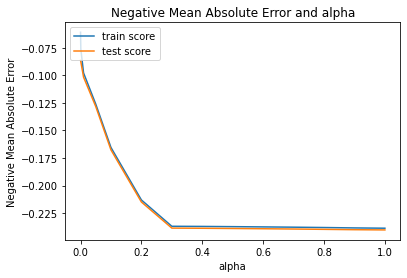

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The Negative Mean Absolute Error comes down and stabilises at around alpha = 0.3. But here we will go with a much lower value of alpha to cover the coefficients of the smallest feature.

In [66]:
#Alpha = 0.01 will give even the smallest of negative coefficients that have some predictive power towards 'SalePrice'
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-1.86704944e-02,  0.00000000e+00,  1.60141757e-02,  1.18162773e-01,
        5.62102941e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.67151300e-05,  2.56052925e-02,  8.50737657e-03,  0.00000000e+00,
       -0.00000000e+00,  1.05262756e-01,  2.47314948e-02,  0.00000000e+00,
        9.76701460e-03,  0.00000000e+00,  0.00000000e+00, -8.85562592e-03,
        1.64949580e-02,  2.52488905e-02,  7.61059502e-05,  4.81472994e-02,
        1.20368969e-02,  6.11956662e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.38089173e-03, -1.56819479e-02, -3.35228976e-06,
       -3.67167209e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

Lasso has brought the coefficients of not useful features to zero

In [67]:
# parameters for lasso model
mod_parameters = list(lasso.coef_ )
mod_parameters.insert(0, lasso.intercept_)
mod_parameters = [round(x, 3) for x in mod_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, mod_parameters))

[('constant', 11.826),
 ('MSSubClass', -0.019),
 ('LotFrontage', 0.0),
 ('LotArea', 0.016),
 ('OverallQual', 0.118),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.026),
 ('1stFlrSF', 0.009),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.105),
 ('BsmtFullBath', 0.025),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.01),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.009),
 ('TotRmsAbvGrd', 0.016),
 ('Fireplaces', 0.025),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.048),
 ('GarageArea', 0.012),
 ('WoodDeckSF', 0.006),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.016),
 ('MiscVal', -0.0),
 ('AgeP', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),


In [68]:
# moving on to lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the train set
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)


0.8645494014267456

In [69]:
# prediction on the test set using r2
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.852847863442429

In [70]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15243055674630834


The RMSE value is decent enough and the R2 values for train and test data match well, indicating an optimum model.

In [71]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, mod_parameters))

In [72]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.826
1   MSSubClass  -0.019
2  LotFrontage   0.000
3      LotArea   0.016
4  OverallQual   0.118

In [73]:
# sorting in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  11.826
4              OverallQual   0.118
14               GrLivArea   0.105
5              OverallCond   0.056
24              GarageCars   0.048
10             TotalBsmtSF   0.026
15            BsmtFullBath   0.025
22              Fireplaces   0.025
3                  LotArea   0.016
21            TotRmsAbvGrd   0.016
25              GarageArea   0.012
17                FullBath   0.010
11                1stFlrSF   0.009
30             ScreenPorch   0.008
26              WoodDeckSF   0.006
170      BsmtExposure_none  -0.000
171       BsmtFinType1_BLQ   0.000
169        BsmtExposure_No  -0.000
179       BsmtFinType2_LwQ   0.000
173       BsmtFinType1_LwQ  -0.000
174       BsmtFinType1_Rec   0.000
168        BsmtExposure_Mn   0.000
175       BsmtFinType1_Unf  -0.000
176      BsmtFinType1_none  -0.000
177       BsmtFinType2_BLQ  -0.000
167        BsmtExposure_Gd   0.000
178       BsmtFinType2_GLQ   0.000
172       BsmtFinType1_GLQ   0.000
190           HeatingQC_Po  -0.000
180       BsmtFinType2_Rec  -0.000
181       BsmtFinType2_Unf   0.000
189           HeatingQC_Gd  -0.000
193       Electrical_FuseF  -0.000
182      BsmtFinType2_none  -0.000
165            BsmtCond_TA   0.000
183           Heating_GasA   0.000
184           Heating_GasW   0.000
185           Heating_Grav  -0.000
186           Heating_OthW  -0.000
192           CentralAir_Y   0.000
187           Heating_Wall   0.000
188           HeatingQC_Fa  -0.000
191           HeatingQC_TA  -0.000
166          BsmtCond_none  -0.000
158        Foundation_Wood   0.000
164            BsmtCond_Po   0.000
149           ExterQual_TA  -0.000
137    Exterior2nd_Plywood  -0.000
138      Exterior2nd_Stone   0.000
139     Exterior2nd_Stucco  -0.000
140    Exterior2nd_VinylSd   0.000
141    Exterior2nd_Wd Sdng   0.000
142    Exterior2nd_Wd Shng  -0.000
143     MasVnrType_BrkFace  -0.000
144        MasVnrType_None   0.000
145       MasVnrType_Stone   0.000
146        MasVnrType_none  -0.000
147           ExterQual_Fa  -0.000
148           ExterQual_Gd   0.000
150           ExterCond_Fa  -0.000
163            BsmtCond_Gd   0.000
151           ExterCond_Gd  -0.000
152           ExterCond_Po   0.000
153           ExterCond_TA   0.000
154      Foundation_CBlock  -0.000
155       Foundation_PConc   0.000
156        Foundation_Slab  -0.000
157       Foundation_Stone   0.000
195         Electrical_Mix   0.000
159            BsmtQual_Fa   0.000
160            BsmtQual_Gd   0.000
161            BsmtQual_TA  -0.000
162          BsmtQual_none  -0.000
194       Electrical_FuseP  -0.000
203         Functional_Mod  -0.000
196       Electrical_SBrkr   0.000
197         KitchenQual_Fa  -0.000
228          GarageCond_TA   0.000
229        GarageCond_none  -0.000
230           PavedDrive_P  -0.000
231           PavedDrive_Y   0.000
232              PoolQC_Fa   0.000
233              PoolQC_Gd  -0.000
234            PoolQC_none   0.000
235             Fence_GdWo  -0.000
236            Fence_MnPrv  -0.000
237             Fence_MnWw   0.000
238             Fence_none   0.000
239       MiscFeature_Othr  -0.000
240       MiscFeature_Shed  -0.000
241       MiscFeature_TenC   0.000
242       MiscFeature_none   0.000
243           SaleType_CWD   0.000
244           SaleType_Con   0.000
245         SaleType_ConLD  -0.000
246         SaleType_ConLI  -0.000
247         SaleType_ConLw  -0.000
248           SaleType_New   0.000
249           SaleType_Oth   0.000
250            SaleType_WD  -0.000
251  SaleCondition_AdjLand  -0.000
252   SaleCondition_Alloca   0.000
253   SaleCondition_Family  -0.000
254   SaleCondition_Normal   0.000
227          GarageCond_Po   0.000
226          GarageCond_Gd  -0.000
225          GarageCond_Fa  -0.000
210       FireplaceQu_none  -0.000
198         KitchenQual_Gd   0.000
199         KitchenQual_TA  -0.000
200        Functional_Maj2  -0.000
201        Functional_Min1  -0.000
202        Functional_Min2   0.000
135    Exterior2nd_MetalSd  

In [74]:
# Choosing variables whose coefficients are not zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  11.826
4    OverallQual   0.118
14     GrLivArea   0.105
5    OverallCond   0.056
24    GarageCars   0.048
10   TotalBsmtSF   0.026
15  BsmtFullBath   0.025
22    Fireplaces   0.025
3        LotArea   0.016
21  TotRmsAbvGrd   0.016
25    GarageArea   0.012
17      FullBath   0.010
11      1stFlrSF   0.009
30   ScreenPorch   0.008
26    WoodDeckSF   0.006
33          AgeP  -0.004
20  KitchenAbvGr  -0.009
31      PoolArea  -0.016
1     MSSubClass  -0.019

The important variables for lasso regression with alpha=0.01:
- OverallQual
- GrLivArea
- OverallCond
- GarageCars
- TotalBsmtSF
- BsmtFullBath
- Fireplaces
- LotArea
- TotRmsAbvGrd
- GarageArea
- FullBath
- 1stFlrSF
- ScreenPorch
- WoodDeckSF
- AgeP
- KitchenAbvGr
- PoolArea
- MSSubClass

In [75]:
# These 18 variables obtained from Lasso Regression might have a strong relation with 'SalePrice'
pred.shape

(19, 2)

In [76]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageCars', 'TotalBsmtSF', 'BsmtFullBath', 'Fireplaces', 'LotArea', 'TotRmsAbvGrd', 'GarageArea', 'FullBath', '1stFlrSF', 'ScreenPorch', 'WoodDeckSF', 'AgeP', 'KitchenAbvGr', 'PoolArea', 'MSSubClass']


In [77]:
X_train_lasso = X_train[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageCars', 'TotalBsmtSF', 'BsmtFullBath', 'Fireplaces', 'LotArea', 'TotRmsAbvGrd', 'GarageArea', 'FullBath', '1stFlrSF', 'ScreenPorch', 'WoodDeckSF', 'AgeP', 'KitchenAbvGr', 'PoolArea', 'MSSubClass']]            
X_train_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageCars  TotalBsmtSF  \
175     -0.059996   1.229791     1.252715           2     0.347365   
1408    -1.501313  -0.279140     1.252715           2    -0.973680   
1148     0.660663  -0.757443     1.252715           1    -1.087563   
861     -0.780655  -0.894101    -1.406374           2    -0.023894   
220      0.660663  -0.022906    -0.520011           2     1.021554   

      BsmtFullBath  Fireplaces   LotArea  TotRmsAbvGrd  GarageArea  FullBath  \
175       1.105326    0.622339  0.166080             7    0.478002  0.786946   
1408     -0.807450   -0.935034 -0.261043             6    0.256615 -1.006519   
1148     -0.807450    0.622339 -0.439778             5   -0.850325 -1.006519   
861       1.105326   -0.935034  0.079341             6    0.145921 -1.006519   
220      -0.807450   -0.935034 -0.151525             5    0.934615  0.786946   

      1stFlrSF  ScreenPorch  WoodDeckSF  AgeP  KitchenAbvGr  PoolArea  \
175   2.572160    -0.260661   -0.740805    57     -0.212991 -0.062302   
1408 -1.069794     3.016768   -0.740805   100     -0.212991 -0.062302   
1148 -1.504156    -0.260661   -0.740805    82     -0.212991 -0.062302   
861  -0.303879    -0.260661   -0.740805    45     -0.212991 -0.062302   
220   0.875837    -0.260661    2.124358     0     -0.212991 -0.062302   

      MSSubClass  
175    -0.870387  
1408    0.304785  
1148   -0.165284  
861     3.125199  
220    -0.870387

In [78]:
X_train_lasso.shape

(1021, 18)

In [79]:
X_test_lasso = X_test[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageCars', 'TotalBsmtSF', 'BsmtFullBath', 'Fireplaces', 'LotArea', 'TotRmsAbvGrd', 'GarageArea', 'FullBath', '1stFlrSF', 'ScreenPorch', 'WoodDeckSF', 'AgeP', 'KitchenAbvGr', 'PoolArea', 'MSSubClass']]            
X_test_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageCars  TotalBsmtSF  \
930      1.358461  -0.117457    -0.509551           3     0.899165   
530     -0.099887  -0.035051    -0.509551           2     0.887692   
1291    -0.829061  -0.431748     1.350309           1    -1.019124   
1385    -1.558235  -0.715377     2.280239           1    -0.638220   
305      1.358461   0.905907    -0.509551           3     2.124484   

      BsmtFullBath  Fireplaces   LotArea  TotRmsAbvGrd  GarageArea  FullBath  \
930      -0.851855   -0.987888 -0.211538             7    0.657098  0.798671   
530       1.111895    0.551952  0.029981             5    0.608692  0.798671   
1291     -0.851855   -0.987888 -1.583933             6   -1.017758  0.798671   
1385      1.111895   -0.987888 -0.872447             7   -1.133933 -1.072013   
305       1.111895   -0.987888  0.065215             8    2.002793  0.798671   

      1stFlrSF  ScreenPorch  WoodDeckSF  AgeP  KitchenAbvGr  PoolArea  \
930   0.771223    -0.293788   -0.019795     2     -0.208108 -0.082098   
530   0.884656    -0.293788    0.924930    20     -0.208108 -0.082098   
1291 -1.434127    -0.293788    0.627799    37     -0.208108 -0.082098   
1385 -0.996222    -0.293788   -0.781670    88     -0.208108 -0.082098   
305   2.179903    -0.293788    0.498280     3     -0.208108 -0.082098   

      MSSubClass  
930    -0.879672  
530     0.559791  
1291    2.479076  
1385   -0.159940  
305    -0.879672

#### part of answer for ques.1 for part 2

In [80]:
#Alpha = 0.02 for Ques. 1 in part 2
alpha = 0.02
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-1.08790979e-02,  0.00000000e+00,  1.25426768e-02,  1.18753576e-01,
        4.70302383e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.77045236e-05,  2.22739768e-02,  9.62390671e-03,  0.00000000e+00,
       -0.00000000e+00,  9.35031036e-02,  1.29985995e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.77212620e-04,
        2.14001452e-02,  2.68293501e-02,  8.58539972e-05,  1.69162432e-02,
        2.64072411e-02,  1.27991884e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.88940394e-04, -2.17294035e-03, -5.17987095e-06,
       -4.07648458e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [81]:
# parameters for lasso model
mod_parameters = list(lasso.coef_ )
mod_parameters.insert(0, lasso.intercept_)
mod_parameters = [round(x, 3) for x in mod_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, mod_parameters))

[('constant', 11.846),
 ('MSSubClass', -0.011),
 ('LotFrontage', 0.0),
 ('LotArea', 0.013),
 ('OverallQual', 0.119),
 ('OverallCond', 0.047),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.022),
 ('1stFlrSF', 0.01),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.094),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.021),
 ('Fireplaces', 0.027),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.017),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.002),
 ('MiscVal', -0.0),
 ('AgeP', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('La

In [82]:
# moving on to lasso regression
lm = Lasso(alpha=0.0)
lm.fit(X_train, y_train)

# prediction on the train set
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)


0.9541436602614793

In [83]:
# prediction on the test set using r2
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6093407977942147

In [84]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.24836350446205027


The RMSE value has increased while the R2 values for train and test data has changed substantially. for the training set the r2 value has increased, on the other hand it has decreased for test set

In [85]:
# Creating a dataframe for the coefficients obtained from Lasso
mod2 = list(zip(cols, mod_parameters))

In [86]:
para = pd.DataFrame(mod2)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.846
1   MSSubClass  -0.011
2  LotFrontage   0.000
3      LotArea   0.013
4  OverallQual   0.119

In [87]:
# sorting in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  11.846
4              OverallQual   0.119
14               GrLivArea   0.094
5              OverallCond   0.047
22              Fireplaces   0.027
25              GarageArea   0.026
10             TotalBsmtSF   0.022
21            TotRmsAbvGrd   0.021
24              GarageCars   0.017
3                  LotArea   0.013
15            BsmtFullBath   0.013
11                1stFlrSF   0.010
26              WoodDeckSF   0.001
174       BsmtFinType1_Rec   0.000
178       BsmtFinType2_GLQ   0.000
177       BsmtFinType2_BLQ  -0.000
176      BsmtFinType1_none  -0.000
175       BsmtFinType1_Unf  -0.000
190           HeatingQC_Po  -0.000
173       BsmtFinType1_LwQ  -0.000
179       BsmtFinType2_LwQ  -0.000
171       BsmtFinType1_BLQ   0.000
170      BsmtExposure_none  -0.000
169        BsmtExposure_No  -0.000
168        BsmtExposure_Mn   0.000
167        BsmtExposure_Gd   0.000
172       BsmtFinType1_GLQ   0.000
193       Electrical_FuseF  -0.000
180       BsmtFinType2_Rec   0.000
189           HeatingQC_Gd  -0.000
181       BsmtFinType2_Unf   0.000
165            BsmtCond_TA   0.000
182      BsmtFinType2_none  -0.000
183           Heating_GasA   0.000
184           Heating_GasW   0.000
185           Heating_Grav  -0.000
186           Heating_OthW  -0.000
192           CentralAir_Y   0.000
187           Heating_Wall  -0.000
188           HeatingQC_Fa  -0.000
191           HeatingQC_TA  -0.000
166          BsmtCond_none  -0.000
158        Foundation_Wood   0.000
164            BsmtCond_Po   0.000
163            BsmtCond_Gd   0.000
136      Exterior2nd_Other   0.000
137    Exterior2nd_Plywood  -0.000
138      Exterior2nd_Stone   0.000
139     Exterior2nd_Stucco  -0.000
140    Exterior2nd_VinylSd   0.000
141    Exterior2nd_Wd Sdng   0.000
142    Exterior2nd_Wd Shng  -0.000
143     MasVnrType_BrkFace  -0.000
144        MasVnrType_None  -0.000
145       MasVnrType_Stone   0.000
146        MasVnrType_none  -0.000
147           ExterQual_Fa  -0.000
148           ExterQual_Gd   0.000
149           ExterQual_TA  -0.000
150           ExterCond_Fa  -0.000
151           ExterCond_Gd  -0.000
152           ExterCond_Po  -0.000
153           ExterCond_TA   0.000
154      Foundation_CBlock  -0.000
155       Foundation_PConc   0.000
156        Foundation_Slab  -0.000
157       Foundation_Stone   0.000
195         Electrical_Mix   0.000
159            BsmtQual_Fa   0.000
160            BsmtQual_Gd   0.000
161            BsmtQual_TA  -0.000
162          BsmtQual_none  -0.000
194       Electrical_FuseP  -0.000
201        Functional_Min1  -0.000
196       Electrical_SBrkr   0.000
197         KitchenQual_Fa  -0.000
228          GarageCond_TA   0.000
229        GarageCond_none  -0.000
230           PavedDrive_P  -0.000
231           PavedDrive_Y   0.000
232              PoolQC_Fa   0.000
233              PoolQC_Gd  -0.000
234            PoolQC_none   0.000
235             Fence_GdWo  -0.000
236            Fence_MnPrv  -0.000
237             Fence_MnWw   0.000
238             Fence_none   0.000
239       MiscFeature_Othr  -0.000
240       MiscFeature_Shed  -0.000
241       MiscFeature_TenC   0.000
242       MiscFeature_none   0.000
243           SaleType_CWD   0.000
244           SaleType_Con   0.000
245         SaleType_ConLD  -0.000
246         SaleType_ConLI  -0.000
247         SaleType_ConLw  -0.000
248           SaleType_New   0.000
249           SaleType_Oth   0.000
250            SaleType_WD  -0.000
251  SaleCondition_AdjLand  -0.000
252   SaleCondition_Alloca   0.000
253   SaleCondition_Family  -0.000
254   SaleCondition_Normal   0.000
227          GarageCond_Po   0.000
226          GarageCond_Gd  -0.000
225          GarageCond_Fa  -0.000
210       FireplaceQu_none  -0.000
198         KitchenQual_Gd   0.000
199         KitchenQual_TA  -0.000
200        Functional_Maj2  -0.000
134    Exterior2nd_ImStucc  -0.000
202        Functional_Min2   0.000
203         Functional_Mod  -0.000
204         Functional_Sev  

In [88]:
# Choosing variables whose coefficients are not zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  11.846
4    OverallQual   0.119
14     GrLivArea   0.094
5    OverallCond   0.047
22    Fireplaces   0.027
25    GarageArea   0.026
10   TotalBsmtSF   0.022
21  TotRmsAbvGrd   0.021
24    GarageCars   0.017
3        LotArea   0.013
15  BsmtFullBath   0.013
11      1stFlrSF   0.010
26    WoodDeckSF   0.001
31      PoolArea  -0.002
33          AgeP  -0.004
1     MSSubClass  -0.011

The important variables for lasso regression with alpha=0.02:
- OverallQual
- GrLivArea
- OverallCond
- Fireplaces
- GarageArea
- TotalBsmtSF
- TotRmsAbvGrd
- GarageCars
- LotArea
- BsmtFullBath
- 1stFlrSF
- WoodDeckSF
- PoolArea
- AgeP
- MSSubClass

#### Ridge regression

In [89]:
# alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validating
folds = 5
model1_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model1_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
cv_results = pd.DataFrame(model1_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018301      0.006921         0.006013        0.003059      0.0001   
1       0.017160      0.004707         0.007973        0.004511       0.001   
2       0.024327      0.021982         0.007936        0.004710        0.01   
3       0.018341      0.002701         0.007593        0.001832        0.05   
4       0.017712      0.002563         0.008550        0.003786         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089682          -0.086648          -0.093314   
1   {'alpha': 0.001}          -0.089693          -0.086421          -0.092757   
2    {'alpha': 0.01}          -0.089907          -0.084981          -0.091533   
3    {'alpha': 0.05}          -0.091108          -0.082789          -0.090086   
4     {'alpha': 0.1}          -0.092196          -0.081052          -0.089849   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.113071          -0.094254        -0.095394        0.009244   
1          -0.113084          -0.094146        -0.095220        0.009320   
2          -0.112091          -0.093155        -0.094333        0.009291   
3          -0.110824          -0.091574        -0.093276        0.009335   
4          -0.109755          -0.091751        -0.092920        0.009334   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.057185           -0.058958   
1               25           -0.057197           -0.058974   
2               24           -0.057378           -0.059110   
3               23           -0.058036           -0.059850   
4               22           -0.058727           -0.060876   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.056892           -0.057074           -0.056765   
1           -0.056928           -0.057119           -0.056781   
2           -0.057113           -0.057305           -0.056941   
3           -0.057765           -0.057602           -0.057627   
4           -0.058697           -0.057820           -0.058403   

   mean_train_score  std_train_score  
0         -0.057375         0.000805  
1         -0.057400         0.000801  
2         -0.057569         0.000785  
3         -0.058176         0.000851  
4         -0.058904         0.001038

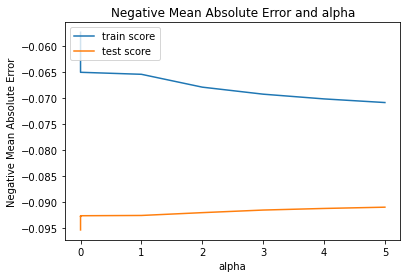

In [91]:
# plotting mean test and train scores against alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Here, the negative mean absolute error stabilises around alpha=2, so we will go ahead with this in the coming steps.

In [92]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.37814670e-02, -3.51109889e-03,  2.04174399e-02,  7.30102298e-02,
        5.27102595e-02,  5.16251341e-03, -3.84616730e-03,  6.92886008e-03,
       -5.49637740e-06, -1.51874108e-03,  4.76092165e-02,  3.94533550e-02,
       -1.12892620e-03,  6.76666483e-02,  2.49495499e-02,  1.62077818e-03,
        2.78057801e-02,  1.26702704e-02,  9.73914183e-04, -1.35927214e-02,
        1.30411283e-02, -4.39547489e-03, -5.90390412e-04,  5.75373720e-02,
        3.39350571e-03,  1.06989333e-02,  6.91734689e-03,  1.25597185e-02,
        6.38193634e-03,  1.27379272e-02, -5.31329646e-03,  6.68981614e-07,
       -1.89841453e-03,  1.34267134e-01,  1.44954771e-01,  1.19393298e-01,
        7.82807459e-02, -1.79352417e-02, -3.73422535e-02,  1.76649130e-02,
       -6.45105804e-02,  3.87699643e-03,  6.37340995e-03, -2.90077589e-03,
        1.19750921e-02,  3.04558208e-02, -4.12734440e-02, -4.36075788e-02,
       -2.18800059e-02,  1.76390809e-02, -5.06347502e-02, -3.80341664e-02,
       -4.41893131e-02,  

In [93]:
# parameters for ridge model
mod_parameters2 = list(ridge.coef_)
mod_parameters2.insert(0, ridge.intercept_)
mod_parameters2 = [round(x, 3) for x in mod_parameters2]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, mod_parameters2))



[('constant', 12.607),
 ('MSSubClass', -0.014),
 ('LotFrontage', -0.004),
 ('LotArea', 0.02),
 ('OverallQual', 0.073),
 ('OverallCond', 0.053),
 ('MasVnrArea', 0.005),
 ('BsmtFinSF1', -0.004),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.002),
 ('1stFlrSF', 0.048),
 ('2ndFlrSF', 0.039),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.068),
 ('BsmtFullBath', 0.025),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.028),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', 0.013),
 ('Fireplaces', -0.004),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.058),
 ('GarageArea', 0.003),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.013),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.005),
 ('MiscVal', 0.0),
 ('AgeP', -0.002),
 ('MSZoning_FV', 0.134),
 ('MSZoning_RH', 0.145),
 ('MSZoning_RL', 0.119),
 ('MSZoning_RM', 0.078),
 ('Alley_Pave', -0.018),
 ('Alley_none', -0.037),
 ('LotShape_IR2', 0.018),
 ('Lot

In [94]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9372297379653967

In [95]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8574523388855417

In [96]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15002678330622726


Using the r2 and RMSE scores we can say that the ridge model is performing slightly better than the lasso model

In [97]:
# dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, mod_parameters2))

In [98]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  12.607
35            MSZoning_RH   0.145
107      RoofMatl_CompShg   0.137
34            MSZoning_FV   0.134
36            MSZoning_RL   0.119
113      RoofMatl_WdShngl   0.118
57   Neighborhood_Crawfor   0.105
249          SaleType_Oth   0.104
108      RoofMatl_Membran   0.097
73   Neighborhood_StoneBr   0.096
116   Exterior1st_BrkFace   0.088
192          CentralAir_Y   0.088
232             PoolQC_Fa   0.087
184          Heating_GasW   0.080
157      Foundation_Stone   0.079
37            MSZoning_RM   0.078
248          SaleType_New   0.077
4             OverallQual   0.073
67   Neighborhood_NridgHt   0.070
254  SaleCondition_Normal   0.069

In [99]:
# Sorting in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                 constant  12.607
35             MSZoning_RH   0.145
107       RoofMatl_CompShg   0.137
34             MSZoning_FV   0.134
36             MSZoning_RL   0.119
113       RoofMatl_WdShngl   0.118
57    Neighborhood_Crawfor   0.105
249           SaleType_Oth   0.104
108       RoofMatl_Membran   0.097
73    Neighborhood_StoneBr   0.096
116    Exterior1st_BrkFace   0.088
192           CentralAir_Y   0.088
232              PoolQC_Fa   0.087
184           Heating_GasW   0.080
157       Foundation_Stone   0.079
37             MSZoning_RM   0.078
248           SaleType_New   0.077
4              OverallQual   0.073
67    Neighborhood_NridgHt   0.070
254   SaleCondition_Normal   0.069
14               GrLivArea   0.068
244           SaleType_Con   0.068
187           Heating_Wall   0.067
81         Condition1_RRAn   0.066
77         Condition1_Norm   0.066
234            PoolQC_none   0.064
251  SaleCondition_AdjLand   0.063
132    Exterior2nd_CmentBd   0.062
66    Neighborhood_NoRidge   0.061
205         Functional_Typ   0.060
252   SaleCondition_Alloca   0.060
24              GarageCars   0.058
105      RoofStyle_Mansard   0.057
55    Neighborhood_ClearCr   0.055
5              OverallCond   0.053
164            BsmtCond_Po   0.052
86         Condition2_PosA   0.051
145       MasVnrType_Stone   0.051
11                1stFlrSF   0.048
243           SaleType_CWD   0.047
227          GarageCond_Po   0.045
134    Exterior2nd_ImStucc   0.044
167        BsmtExposure_Gd   0.043
155       Foundation_PConc   0.040
111       RoofMatl_Tar&Grv   0.039
12                2ndFlrSF   0.039
54    Neighborhood_BrkSide   0.039
215      GarageType_Detchd   0.039
141    Exterior2nd_Wd Sdng   0.038
79         Condition1_PosN   0.037
211      GarageType_Attchd   0.037
213     GarageType_BuiltIn   0.036
121    Exterior1st_MetalSd   0.036
91         BldgType_2fmCon   0.036
202        Functional_Min2   0.035
92         BldgType_Duplex   0.035
231           PavedDrive_Y   0.034
144        MasVnrType_None   0.033
90         Condition2_RRNn   0.033
125    Exterior1st_VinylSd   0.033
147           ExterQual_Fa   0.033
221          GarageQual_Gd   0.032
75    Neighborhood_Veenker   0.031
46       LotConfig_CulDSac   0.030
158        Foundation_Wood   0.029
17                FullBath   0.028
245         SaleType_ConLD   0.028
122    Exterior1st_Plywood   0.028
72    Neighborhood_Somerst   0.027
69      Neighborhood_SWISU   0.027
230           PavedDrive_P   0.026
15            BsmtFullBath   0.025
163            BsmtCond_Gd   0.025
78         Condition1_PosA   0.025
110          RoofMatl_Roll   0.025
165            BsmtCond_TA   0.024
242       MiscFeature_none   0.024
83         Condition1_RRNn   0.022
128    Exterior2nd_AsphShn   0.021
255  SaleCondition_Partial   0.021
3                  LotArea   0.020
96       HouseStyle_1Story   0.020
100      HouseStyle_SFoyer   0.019
133    Exterior2nd_HdBoard   0.019
40            LotShape_IR2   0.018
154      Foundation_CBlock   0.018
50           LandSlope_Mod   0.018
201        Functional_Min1   0.017
253   SaleCondition_Family   0.017
143     MasVnrType_BrkFace   0.017
124     Exterior1st_Stucco   0.015
212     GarageType_Basment   0.014
21            TotRmsAbvGrd   0.013
18                HalfBath   0.013
28           EnclosedPorch   0.013
30             ScreenPorch   0.013
45         LandContour_Lvl   0.012
74     Neighborhood_Timber   0.012
181       BsmtFinType2_Unf   0.012
112       RoofMatl_WdShake   0.012
26              WoodDeckSF   0.011
140    Exterior2nd_VinylSd   0.010
148           ExterQual_Gd   0.010
127    Exterior1st_WdShing   0.010
153           ExterCond_TA   0.008
101        HouseStyle_SLvl   0.008
27             OpenPorchSF   0.007
238             Fence_none   0.007
8               BsmtFinSF2   0.007
43         LandContour_HLS   0.006
29               3SsnPorch   0.006
98       HouseStyle_2.5Unf   0.006
247         SaleType_ConLw   0.005
6               MasVnrArea  

In [100]:
# removing coefficients=0
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  12.607
35             MSZoning_RH   0.145
107       RoofMatl_CompShg   0.137
34             MSZoning_FV   0.134
36             MSZoning_RL   0.119
113       RoofMatl_WdShngl   0.118
57    Neighborhood_Crawfor   0.105
249           SaleType_Oth   0.104
108       RoofMatl_Membran   0.097
73    Neighborhood_StoneBr   0.096
116    Exterior1st_BrkFace   0.088
192           CentralAir_Y   0.088
232              PoolQC_Fa   0.087
184           Heating_GasW   0.080
157       Foundation_Stone   0.079
37             MSZoning_RM   0.078
248           SaleType_New   0.077
4              OverallQual   0.073
67    Neighborhood_NridgHt   0.070
254   SaleCondition_Normal   0.069
14               GrLivArea   0.068
244           SaleType_Con   0.068
187           Heating_Wall   0.067
81         Condition1_RRAn   0.066
77         Condition1_Norm   0.066
234            PoolQC_none   0.064
251  SaleCondition_AdjLand   0.063
132    Exterior2nd_CmentBd   0.062
66    Neighborhood_NoRidge   0.061
205         Functional_Typ   0.060
252   SaleCondition_Alloca   0.060
24              GarageCars   0.058
105      RoofStyle_Mansard   0.057
55    Neighborhood_ClearCr   0.055
5              OverallCond   0.053
164            BsmtCond_Po   0.052
86         Condition2_PosA   0.051
145       MasVnrType_Stone   0.051
11                1stFlrSF   0.048
243           SaleType_CWD   0.047
227          GarageCond_Po   0.045
134    Exterior2nd_ImStucc   0.044
167        BsmtExposure_Gd   0.043
155       Foundation_PConc   0.040
111       RoofMatl_Tar&Grv   0.039
12                2ndFlrSF   0.039
54    Neighborhood_BrkSide   0.039
215      GarageType_Detchd   0.039
141    Exterior2nd_Wd Sdng   0.038
79         Condition1_PosN   0.037
211      GarageType_Attchd   0.037
213     GarageType_BuiltIn   0.036
121    Exterior1st_MetalSd   0.036
91         BldgType_2fmCon   0.036
202        Functional_Min2   0.035
92         BldgType_Duplex   0.035
231           PavedDrive_Y   0.034
144        MasVnrType_None   0.033
90         Condition2_RRNn   0.033
125    Exterior1st_VinylSd   0.033
147           ExterQual_Fa   0.033
221          GarageQual_Gd   0.032
75    Neighborhood_Veenker   0.031
46       LotConfig_CulDSac   0.030
158        Foundation_Wood   0.029
17                FullBath   0.028
245         SaleType_ConLD   0.028
122    Exterior1st_Plywood   0.028
72    Neighborhood_Somerst   0.027
69      Neighborhood_SWISU   0.027
230           PavedDrive_P   0.026
15            BsmtFullBath   0.025
163            BsmtCond_Gd   0.025
78         Condition1_PosA   0.025
110          RoofMatl_Roll   0.025
165            BsmtCond_TA   0.024
242       MiscFeature_none   0.024
83         Condition1_RRNn   0.022
128    Exterior2nd_AsphShn   0.021
255  SaleCondition_Partial   0.021
3                  LotArea   0.020
96       HouseStyle_1Story   0.020
100      HouseStyle_SFoyer   0.019
133    Exterior2nd_HdBoard   0.019
40            LotShape_IR2   0.018
154      Foundation_CBlock   0.018
50           LandSlope_Mod   0.018
201        Functional_Min1   0.017
253   SaleCondition_Family   0.017
143     MasVnrType_BrkFace   0.017
124     Exterior1st_Stucco   0.015
212     GarageType_Basment   0.014
21            TotRmsAbvGrd   0.013
18                HalfBath   0.013
28           EnclosedPorch   0.013
30             ScreenPorch   0.013
45         LandContour_Lvl   0.012
74     Neighborhood_Timber   0.012
181       BsmtFinType2_Unf   0.012
112       RoofMatl_WdShake   0.012
26              WoodDeckSF   0.011
140    Exterior2nd_VinylSd   0.010
148           ExterQual_Gd   0.010
127    Exterior1st_WdShing   0.010
153           ExterCond_TA   0.008
101        HouseStyle_SLvl   0.008
27             OpenPorchSF   0.007
238             Fence_none   0.007
8               BsmtFinSF2   0.007
43         LandContour_HLS   0.006
29               3SsnPorch   0.006
98       HouseStyle_2.5Unf   0.006
247         SaleType_ConLw   0.005
6               MasVnrArea  

In [101]:
predRFE.shape

(243, 2)

The top 10 variables for ridge regression with alpha=2
- MSZoning_RH
- RoofMatl_CompShg
- MSZoning_FV
- MSZoning_RL
- RoofMatl_WdShngl
- Neighborhood_Crawfor
- SaleType_Oth
- RoofMatl_Membran
- Neighborhood_StoneBr
- Exterior1st_BrkFace


So, we have arrived at the final 18 features that should be chosen to make a prediction if we are talking about the price of the property.
The positive coefficient values suggest a directly proportional relationship between price of the property and that particular feature. While the negative coeffecient show an inversely proportional relation. A good example for this would be AgeP(age of the property, negative coeffiecient) and OverallQual(overall quality of the property, positive coefficient).

#### part of answer for ques.1 for part 2

In [102]:
#Alpha = 4 for Ques. 1 in part 2
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.66445461e-02, -5.39154720e-03,  1.92392898e-02,  7.69875329e-02,
        5.36096172e-02,  4.84242660e-03, -5.87488374e-03,  6.77063259e-03,
       -7.20505430e-06, -3.71925639e-03,  4.71840014e-02,  3.86987159e-02,
       -1.42678615e-03,  6.67030690e-02,  2.60755832e-02,  2.20984717e-03,
        2.95115528e-02,  1.35726299e-02,  1.76166020e-03, -1.30256151e-02,
        1.37382562e-02, -3.29046469e-03, -5.87584349e-04,  6.01513691e-02,
        2.60853768e-03,  1.11011010e-02,  7.05495472e-03,  1.24952195e-02,
        6.35946245e-03,  1.28942464e-02, -7.99249060e-03,  6.90394915e-08,
       -1.89487781e-03,  8.35380789e-02,  8.98405621e-02,  7.57383848e-02,
        2.95678473e-02, -1.20538144e-02, -3.12153455e-02,  1.65327869e-02,
       -6.03921347e-02,  3.53218940e-03,  9.26659118e-03,  5.51859209e-03,
        1.23423603e-02,  3.07176730e-02, -3.82841286e-02, -2.82616526e-02,
       -2.04421276e-02,  1.62653138e-02, -3.44688582e-02, -2.12950432e-02,
       -3.44479303e-02,  

In [103]:
# parameters for ridge model
mod_parameters2 = list(ridge.coef_)
mod_parameters2.insert(0, ridge.intercept_)
mod_parameters2 = [round(x, 3) for x in mod_parameters2]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, mod_parameters2))



[('constant', 12.679),
 ('MSSubClass', -0.017),
 ('LotFrontage', -0.005),
 ('LotArea', 0.019),
 ('OverallQual', 0.077),
 ('OverallCond', 0.054),
 ('MasVnrArea', 0.005),
 ('BsmtFinSF1', -0.006),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.004),
 ('1stFlrSF', 0.047),
 ('2ndFlrSF', 0.039),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.067),
 ('BsmtFullBath', 0.026),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.03),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.002),
 ('KitchenAbvGr', -0.013),
 ('TotRmsAbvGrd', 0.014),
 ('Fireplaces', -0.003),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.06),
 ('GarageArea', 0.003),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.008),
 ('MiscVal', 0.0),
 ('AgeP', -0.002),
 ('MSZoning_FV', 0.084),
 ('MSZoning_RH', 0.09),
 ('MSZoning_RL', 0.076),
 ('MSZoning_RM', 0.03),
 ('Alley_Pave', -0.012),
 ('Alley_none', -0.031),
 ('LotShape_IR2', 0.017),
 ('LotSha

In [104]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9372297379653967

In [105]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8574523388855417

In [106]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15002678330622726


Using the r2 and RMSE scores we can say that the ridge model is performing slightly better than the lasso model

In [107]:
# dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, mod_parameters2))

In [108]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  12.679
107      RoofMatl_CompShg   0.105
57   Neighborhood_Crawfor   0.100
35            MSZoning_RH   0.090
73   Neighborhood_StoneBr   0.086
34            MSZoning_FV   0.084
192          CentralAir_Y   0.081
4             OverallQual   0.077
36            MSZoning_RL   0.076
116   Exterior1st_BrkFace   0.075
113      RoofMatl_WdShngl   0.072
184          Heating_GasW   0.069
67   Neighborhood_NridgHt   0.068
249          SaleType_Oth   0.068
14              GrLivArea   0.067
254  SaleCondition_Normal   0.066
248          SaleType_New   0.062
24             GarageCars   0.060
77        Condition1_Norm   0.059
205        Functional_Typ   0.058

In [109]:
# Sorting in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                 constant  12.679
107       RoofMatl_CompShg   0.105
57    Neighborhood_Crawfor   0.100
35             MSZoning_RH   0.090
73    Neighborhood_StoneBr   0.086
34             MSZoning_FV   0.084
192           CentralAir_Y   0.081
4              OverallQual   0.077
36             MSZoning_RL   0.076
116    Exterior1st_BrkFace   0.075
113       RoofMatl_WdShngl   0.072
184           Heating_GasW   0.069
67    Neighborhood_NridgHt   0.068
249           SaleType_Oth   0.068
14               GrLivArea   0.067
254   SaleCondition_Normal   0.066
248           SaleType_New   0.062
24              GarageCars   0.060
77         Condition1_Norm   0.059
205         Functional_Typ   0.058
66    Neighborhood_NoRidge   0.057
232              PoolQC_Fa   0.056
5              OverallCond   0.054
157       Foundation_Stone   0.054
81         Condition1_RRAn   0.052
108       RoofMatl_Membran   0.050
105      RoofStyle_Mansard   0.049
11                1stFlrSF   0.047
55    Neighborhood_ClearCr   0.046
167        BsmtExposure_Gd   0.044
132    Exterior2nd_CmentBd   0.044
187           Heating_Wall   0.043
252   SaleCondition_Alloca   0.043
244           SaleType_Con   0.043
145       MasVnrType_Stone   0.042
155       Foundation_PConc   0.041
91         BldgType_2fmCon   0.040
251  SaleCondition_AdjLand   0.040
12                2ndFlrSF   0.039
54    Neighborhood_BrkSide   0.039
234            PoolQC_none   0.039
134    Exterior2nd_ImStucc   0.037
141    Exterior2nd_Wd Sdng   0.036
92         BldgType_Duplex   0.035
202        Functional_Min2   0.032
243           SaleType_CWD   0.032
231           PavedDrive_Y   0.031
227          GarageCond_Po   0.031
46       LotConfig_CulDSac   0.031
17                FullBath   0.030
221          GarageQual_Gd   0.030
37             MSZoning_RM   0.030
86         Condition2_PosA   0.029
215      GarageType_Detchd   0.029
72    Neighborhood_Somerst   0.029
121    Exterior1st_MetalSd   0.029
79         Condition1_PosN   0.028
144        MasVnrType_None   0.028
164            BsmtCond_Po   0.028
255  SaleCondition_Partial   0.028
125    Exterior1st_VinylSd   0.027
211      GarageType_Attchd   0.027
213     GarageType_BuiltIn   0.026
75    Neighborhood_Veenker   0.026
15            BsmtFullBath   0.026
163            BsmtCond_Gd   0.025
230           PavedDrive_P   0.024
165            BsmtCond_TA   0.022
96       HouseStyle_1Story   0.022
100      HouseStyle_SFoyer   0.021
122    Exterior1st_Plywood   0.021
242       MiscFeature_none   0.021
245         SaleType_ConLD   0.021
69      Neighborhood_SWISU   0.020
133    Exterior2nd_HdBoard   0.019
3                  LotArea   0.019
158        Foundation_Wood   0.019
90         Condition2_RRNn   0.019
181       BsmtFinType2_Unf   0.019
78         Condition1_PosA   0.018
153           ExterCond_TA   0.017
147           ExterQual_Fa   0.017
40            LotShape_IR2   0.017
154      Foundation_CBlock   0.016
50           LandSlope_Mod   0.016
111       RoofMatl_Tar&Grv   0.015
18                HalfBath   0.014
21            TotRmsAbvGrd   0.014
128    Exterior2nd_AsphShn   0.014
83         Condition1_RRNn   0.014
30             ScreenPorch   0.013
201        Functional_Min1   0.013
45         LandContour_Lvl   0.012
28           EnclosedPorch   0.012
143     MasVnrType_BrkFace   0.011
110          RoofMatl_Roll   0.011
26              WoodDeckSF   0.011
253   SaleCondition_Family   0.010
140    Exterior2nd_VinylSd   0.010
238             Fence_none   0.009
74     Neighborhood_Timber   0.009
43         LandContour_HLS   0.009
101        HouseStyle_SLvl   0.009
27             OpenPorchSF   0.007
8               BsmtFinSF2   0.007
127    Exterior1st_WdShing   0.006
44         LandContour_Low   0.006
29               3SsnPorch   0.006
148           ExterQual_Gd   0.005
6               MasVnrArea   0.005
212     GarageType_Basment   0.004
98       HouseStyle_2.5Unf   0.004
42            LotShape_Reg   0.004
135    Exterior2nd_MetalSd  

In [110]:
# removing coefficients=0
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  12.679
107       RoofMatl_CompShg   0.105
57    Neighborhood_Crawfor   0.100
35             MSZoning_RH   0.090
73    Neighborhood_StoneBr   0.086
34             MSZoning_FV   0.084
192           CentralAir_Y   0.081
4              OverallQual   0.077
36             MSZoning_RL   0.076
116    Exterior1st_BrkFace   0.075
113       RoofMatl_WdShngl   0.072
184           Heating_GasW   0.069
67    Neighborhood_NridgHt   0.068
249           SaleType_Oth   0.068
14               GrLivArea   0.067
254   SaleCondition_Normal   0.066
248           SaleType_New   0.062
24              GarageCars   0.060
77         Condition1_Norm   0.059
205         Functional_Typ   0.058
66    Neighborhood_NoRidge   0.057
232              PoolQC_Fa   0.056
5              OverallCond   0.054
157       Foundation_Stone   0.054
81         Condition1_RRAn   0.052
108       RoofMatl_Membran   0.050
105      RoofStyle_Mansard   0.049
11                1stFlrSF   0.047
55    Neighborhood_ClearCr   0.046
167        BsmtExposure_Gd   0.044
132    Exterior2nd_CmentBd   0.044
187           Heating_Wall   0.043
252   SaleCondition_Alloca   0.043
244           SaleType_Con   0.043
145       MasVnrType_Stone   0.042
155       Foundation_PConc   0.041
91         BldgType_2fmCon   0.040
251  SaleCondition_AdjLand   0.040
12                2ndFlrSF   0.039
54    Neighborhood_BrkSide   0.039
234            PoolQC_none   0.039
134    Exterior2nd_ImStucc   0.037
141    Exterior2nd_Wd Sdng   0.036
92         BldgType_Duplex   0.035
202        Functional_Min2   0.032
243           SaleType_CWD   0.032
231           PavedDrive_Y   0.031
227          GarageCond_Po   0.031
46       LotConfig_CulDSac   0.031
17                FullBath   0.030
221          GarageQual_Gd   0.030
37             MSZoning_RM   0.030
86         Condition2_PosA   0.029
215      GarageType_Detchd   0.029
72    Neighborhood_Somerst   0.029
121    Exterior1st_MetalSd   0.029
79         Condition1_PosN   0.028
144        MasVnrType_None   0.028
164            BsmtCond_Po   0.028
255  SaleCondition_Partial   0.028
125    Exterior1st_VinylSd   0.027
211      GarageType_Attchd   0.027
213     GarageType_BuiltIn   0.026
75    Neighborhood_Veenker   0.026
15            BsmtFullBath   0.026
163            BsmtCond_Gd   0.025
230           PavedDrive_P   0.024
165            BsmtCond_TA   0.022
96       HouseStyle_1Story   0.022
100      HouseStyle_SFoyer   0.021
122    Exterior1st_Plywood   0.021
242       MiscFeature_none   0.021
245         SaleType_ConLD   0.021
69      Neighborhood_SWISU   0.020
133    Exterior2nd_HdBoard   0.019
3                  LotArea   0.019
158        Foundation_Wood   0.019
90         Condition2_RRNn   0.019
181       BsmtFinType2_Unf   0.019
78         Condition1_PosA   0.018
153           ExterCond_TA   0.017
147           ExterQual_Fa   0.017
40            LotShape_IR2   0.017
154      Foundation_CBlock   0.016
50           LandSlope_Mod   0.016
111       RoofMatl_Tar&Grv   0.015
18                HalfBath   0.014
21            TotRmsAbvGrd   0.014
128    Exterior2nd_AsphShn   0.014
83         Condition1_RRNn   0.014
30             ScreenPorch   0.013
201        Functional_Min1   0.013
45         LandContour_Lvl   0.012
28           EnclosedPorch   0.012
143     MasVnrType_BrkFace   0.011
110          RoofMatl_Roll   0.011
26              WoodDeckSF   0.011
253   SaleCondition_Family   0.010
140    Exterior2nd_VinylSd   0.010
238             Fence_none   0.009
74     Neighborhood_Timber   0.009
43         LandContour_HLS   0.009
101        HouseStyle_SLvl   0.009
27             OpenPorchSF   0.007
8               BsmtFinSF2   0.007
127    Exterior1st_WdShing   0.006
44         LandContour_Low   0.006
29               3SsnPorch   0.006
148           ExterQual_Gd   0.005
6               MasVnrArea   0.005
212     GarageType_Basment   0.004
98       HouseStyle_2.5Unf   0.004
42            LotShape_Reg   0.004
135    Exterior2nd_MetalSd  

The top 10 variables for ridge regression with alpha=4:
- RoofMatl_CompShg
- Neighborhood_Crawfor
- MSZoning_RH
- Neighborhood_StoneBr
- MSZoning_FV
- CentralAir_Y
- OverallQual
- MSZoning_RL
- Exterior1st_BrkFace
- RoofMatl_WdShngl